# Многослойный перцептрон

## Лабораторная работа №4

Присвойте строку с вашим ФИО переменной `name` и выполните ячейку. В ее выводе будет указан номер вашего варианта.

In [ ]:
name = "Шурова Дарья Сергеевна" # Впишите ваше ФИО

def calculate_variant(name):
    return sum(ord(char) for char in name) % 2 + 1

print(f"Ваш вариант - №{calculate_variant(name)}")

Ваш вариант - №1



---

**Впишите в эту ячейку ваши ФИО, группу и вариант**.

ФИО: Шурова Дарья Сергеевна

Группа: 221-328

Вариант: 1

---

Далее по ходу ноутбука вам встрется ячейки с кодом, в которых будут комментарии с заданиями, и текстовые ячейки как эта с вопросами, на которые вам необходимо письменно в ноутбуке ответить.

Все ячейки необходимо запускать.

Данные для вариантов лежат по ссылкам:

1. http://labcolor.space/mlp-1.csv
1. http://labcolor.space/mlp-2.csv

Скопируйте ссылку для своего варианта.

## Импорт модулей

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

## Загрузка данных

Используя уже знакомые вам функции, загрузите данные и проведите их анализ на предмет количества признаков, объектов и классов. В данных последний столбец это целевой признак, а первая строка — это порядковый номер признака начиная с 0.

In [ ]:
df = pd.read_csv("http://labcolor.space/mlp-1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1.710757,-1.780858,4.465663,1.413179,-7.219222,-2.859229,5.342539,3.826129,4.795143,-16.256612,...,5.736963,1.269012,2.185358,-0.043486,3.956013,-3.973986,5.630684,0.205138,-2.197273,1
1,0.676909,3.242201,2.186408,-1.968044,-9.972945,-64.364751,4.772918,-5.389642,-5.293382,-27.726015,...,-0.485495,3.900130,8.734047,-5.569484,3.698377,1.752380,-3.112352,-2.025313,-0.906185,2
2,-4.040393,5.154852,-1.307705,-1.710272,9.816479,24.742294,-8.155285,6.849502,-2.683671,-27.408234,...,-5.152908,1.073146,4.585533,-1.774986,-6.449271,0.688018,2.257834,-0.383500,3.305582,4
3,-3.353588,-0.519829,1.309168,-2.183328,-8.838840,7.330797,0.794825,1.537075,-3.220577,25.624882,...,-6.119220,-8.156908,1.798813,8.218492,-0.456301,-1.163886,4.222513,-5.710395,-2.373418,3
4,3.468905,5.880065,-0.401403,2.402747,3.462955,52.287895,5.828849,-4.437334,-4.428698,-16.815148,...,-4.262916,-1.941936,-4.904798,0.710937,0.172677,1.321554,-0.378816,-3.544775,5.098342,5


In [ ]:
df.shape

(3000, 101)

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2999.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2999.000000,3000.000000
mean,0.287959,0.043524,0.308482,-0.216480,-0.154342,-0.956079,0.347764,0.061710,-0.010901,1.546437,...,0.439559,-0.370378,-0.176658,0.026016,-0.232849,-0.027402,0.013620,0.134573,0.298384,2.500000
std,5.512976,5.614774,5.501132,5.698983,5.622396,32.186223,5.375190,5.588634,5.582691,31.216878,...,5.435729,5.445187,5.558786,5.528614,5.446676,5.690365,5.397868,5.445917,5.588768,1.708305
min,-18.877100,-24.381196,-22.654228,-18.378306,-17.110999,-122.535311,-21.717615,-22.094985,-22.762413,-96.626739,...,-20.909316,-19.172642,-19.437172,-20.008127,-20.981607,-22.403447,-21.853190,-18.701037,-19.281882,0.000000
25%,-3.302764,-3.778152,-3.353998,-4.093874,-3.972482,-22.191360,-3.305012,-3.736169,-3.623540,-19.795028,...,-3.130707,-3.840465,-3.906528,-3.651233,-3.919866,-3.788704,-3.606531,-3.468100,-3.501230,1.000000
50%,0.374525,0.108945,0.318503,-0.182516,-0.210993,-0.505058,0.472466,0.025267,-0.050907,1.998854,...,0.266942,-0.286760,-0.252997,-0.124567,-0.100574,-0.072046,-0.061871,0.204576,0.409919,3.000000
75%,3.923253,3.971174,4.003994,3.670718,3.677614,21.323796,3.915820,3.786054,3.760160,22.975298,...,4.046634,3.187927,3.574034,3.790397,3.420420,3.809003,3.664416,3.770615,4.151106,4.000000
max,18.184899,18.455063,20.431353,20.732916,18.334473,107.083796,21.761692,19.895895,21.230505,106.155900,...,17.155868,18.902387,18.387337,19.355871,18.234951,19.081056,19.719208,19.887937,19.787039,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 101 entries, 0 to 100
dtypes: float64(100), int64(1)
memory usage: 2.3 MB


In [ ]:
df['100'].value_counts()

100
3    504
1    501
5    501
0    500
2    497
4    497
Name: count, dtype: int64

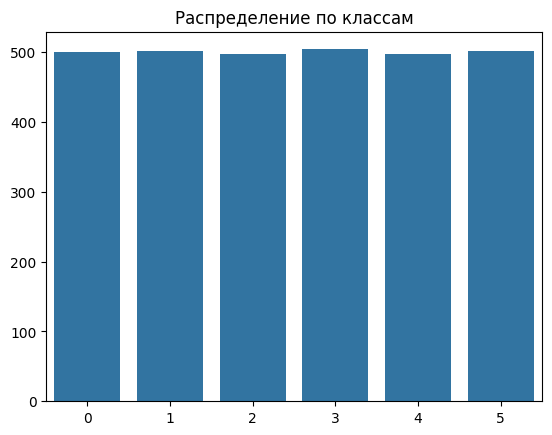

In [ ]:
labels, counts = np.unique(df['100'], return_counts=True)
fig, axs = plt.subplots(ncols=1)
sns.barplot(x=[str(label) for label in labels], y=counts, ax=axs).set_title("Распределение по классам")
plt.show()

**Описание данных**

Ваш ответ:

Число объектов: **3000**

Число признаков: **100 факторных и 1 целевой**

Число классов целевого признака: **6**

## Подготовка данных

Убедитесь что в данных нет отсутствующих значений, если они есть, удалите их или заполните средними значениями - `df.isnull()`.

In [ ]:
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
96     0
97     0
98     0
99     1
100    0
Length: 101, dtype: int64

In [ ]:
cols_with_missing_values = df.columns[df.isnull().any()]
print(cols_with_missing_values)

Index(['8', '13', '14', '29', '32', '35', '53', '57', '71', '77', '88', '99'], dtype='object')


In [ ]:
df = df.fillna(df.mean()) # заполнение средним значением

In [ ]:
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
96     0
97     0
98     0
99     0
100    0
Length: 101, dtype: int64

**Были ли отсутствующие значения и что вы с ними сделали?**

Ваш ответ: Были отсутствующие значения в столбцах ['8', '13', '14', '29', '32', '35', '53', '57', '71', '77', '88', '99'], они были заполнены средним значением по столбцу.

С помощью `train_test_split` разделите данные на обучающие и тестовые (15-20%). Не забудьте про `random_state`.

In [ ]:
y = df.pop('100')
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.15)

Масштабируйте признаки. Для этого импортируйте соответствующий класс, создайте его экземпляр, выполните его "подгонку" и примените его к признакам.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)

## Обучение модели и подборка гиперпараметров

Гиперпараметры и их значения задаются в виде словаря и затем вместе с экземпляром модели в качестве аргументов передаются в конструктор класса `GridSearchCV`, который будет создавать разные варианты модели и обучать их, используя кросс валидацию, сохраняя промежуточные результаты.

Попробуйте разные варианты:
* количества нейронов в скрытых слоях (hidden_layer_sizes),
* функций активации (activation),
* скорости обучения (learning_rate_init).

**Что такое гиперпараметры для модели?**

Ваш ответ: Гиперпараметры в машинном обучении — это параметры алгоритмов, значения которых устанавливаются перед запуском процесса обучения. Они используются для управления этим процессом и могут включать, например, крутизну активационной функции, число скрытых слоёв и нейронов, коэффициент скорости обучения и другие параметры.

**Опишите суть кросс валидации.**

Ваш ответ: Суть кросс-валидации заключается в оценке производительности модели машинного обучения путём разделения исходного набора данных на две или более части. Одна часть используется для обучения модели, а другая — для проверки её качества. Этот процесс повторяется несколько раз с использованием разных разбиений данных, что позволяет получить более надёжную оценку производительности модели.

**В чем заключается идея поиска по сетке (grid search)?**

Ваш ответ: Идея поиска по сетке (grid search) заключается в настройке гиперпараметров модели машинного обучения путём перебора всех возможных их комбинаций. Это позволяет найти оптимальные значения гиперпараметров, которые обеспечивают наилучшую производительность модели на обучающем наборе данных.

In [ ]:
param_grid = {
    'hidden_layer_sizes' : [15, 20, 25, 30],
    'activation' : ['logistic', 'tanh', 'relu'],
    'learning_rate_init' : [0.0004, 0.0005, 0.0007, 0.0009, 0.0015]
}

**Сколько вариантов модели будет в итоге обучено?**

Ваш ответ:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(random_state=42, max_iter=2000, learning_rate='adaptive', solver='sgd')

grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

GridSearchCV(cv=3,
             estimator=MLPClassifier(learning_rate='adaptive', max_iter=2000,
                                     random_state=42, solver='sgd'),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [15, 20, 25, 30],
                         'learning_rate_init': [0.0004, 0.0005, 0.0007, 0.0009,
                                                0.0015]},
             scoring='accuracy')

**Что значит cv=3 для GridSearchCV?**

Ваш ответ: CV=3 для GridSearchCV означает, что используется метод кросс-валидации с тремя фолдами (folds).

In [ ]:
print(f"Гиперпараметры модели с лучшим результатом: {grid_search.best_params_}")
print(f"Лучшая точность при кросс валидации: {grid_search.best_score_:.2f}")

Гиперпараметры модели с лучшим результатом: {'activation': 'relu', 'hidden_layer_sizes': 30, 'learning_rate_init': 0.0015}
Лучшая точность при кросс валидации: 0.58


## Тест наилучшей модели

In [ ]:
test_accuracy = grid_search.score(X_test_scaled, y_test) # Подставьте данные тестовой выборки
print(f"Точность на тестовой выборке: {test_accuracy:.2f}")

Точность на тестовой выборке: 0.62


In [ ]:
# Если понадобится сохранить лучший вариант, то он находится в атрибуте best_estimator_
# Все данные по кросс валидации находятся в атрибуте cv_results_

best_model = grid_search.best_estimator_
best_model

MLPClassifier(hidden_layer_sizes=30, learning_rate='adaptive',
              learning_rate_init=0.0015, max_iter=2000, random_state=42,
              solver='sgd')

In [ ]:
n_features = 100 # количество признаков в вашем наборе данных
m_hidden = 30  # hidden_layer_sizes
L_hidden = 1   # один скрытый слой
K = 8 # количество классов

# Рассчитаем количество параметров
params_between_input_and_hidden = n_features * m_hidden + m_hidden
params_between_hidden_layers = L_hidden * (m_hidden * m_hidden + m_hidden)
params_between_hidden_and_output = m_hidden * K + K

# Общее количество параметров
total_params = (params_between_input_and_hidden +
                params_between_hidden_layers +
                params_between_hidden_and_output)

# Учитываем параметры для биасов
total_params_with_biases = total_params + m_hidden + K  # m_hidden - для каждого слоя, K - для выходного слоя

print("Общее количество параметров в модели:", total_params_with_biases)

Общее количество параметров в модели: 4246


**Что такое эпоха (epoch) при обучении модели?**

Ваш ответ: Эпоха (epoch) в машинном обучении — это один проход всех доступных данных через нейронную сеть в прямом и обратном направлении. Это базовый цикл обучения, который повторяется заданное количество раз для достижения оптимальной настройки модели.

**Сколько эпох задается изначально при создании MLPClassifier?**

Ваш ответ: Изначально при создании MLPClassifier задаётся 200 эпох.

**Для чего требуется регуляризация L2 или L1?**

Ваш ответ: Регуляризация L2 и L1 используется для предотвращения переобучения модели на обучающих данных. Она вводит дополнительные ограничения или штрафы на величину и сложность модели, обеспечивая более гладкую и устойчивую модель, которая лучше обобщает закономерности и уменьшает риск переобучения.

**Сколько параметров в вашей лучшей модели?**

Ваш ответ: Общее количество параметров в модели - 4246